# Libraries

In [1]:
import os

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import wordnet as wn 

## Gather

In [2]:
df_IN = pd.read_csv("Indian_recipes_details.csv")
df_ME = pd.read_csv("ME_recipes_details.csv")
df_FR = pd.read_csv("French_recipes_details.csv")

In [3]:
df_IN.sample()

,ingredients_string,name,url
176,1 tablespoon vegetable oil 4 (2 inch) cinnamon...,Chicken Korma,https://www.allrecipes.com/recipe/38809/chicke...


In [4]:
df_ME.sample()

,ingredients,name,url,ingredients_proper,ingredients_string
274,"['1', '1/2', 'cups', 'all-purpose', 'flour', '...",Sambusaks Sumboosaks With Chickpeas,https://www.allrecipes.com/recipe/216953/sambu...,"['cilantro', 'cumin', 'flour', 'garbanzo', 'oi...",1 1/2 cups all-purpose flour 1 tablespoon corn...


In [5]:
df_FR.sample()

,ingredients_string,name,url
363,1/3 cup white vinegar 1/4 cup minced shallots ...,Bearnaise Sauce I,https://www.allrecipes.com/recipe/24313/bearna...


In [6]:
df_ME.drop(['ingredients', 'ingredients_proper'], axis=1, inplace=True)
df_ME.sample()

,name,url,ingredients_string
261,Duck Fesenjan,https://www.allrecipes.com/recipe/240607/duck-...,8 legs duck salt and freshly ground black pepp...


In [7]:
df_IN['class'] = "Indian"

In [8]:
df_IN.sample()

,ingredients_string,name,url,class
365,1 pound fresh okra salt to taste 2 teaspoons c...,Okra Fry,https://www.allrecipes.com/recipe/13990/okra-fry/,Indian


In [9]:
df_ME['class'] = "Middle_eastern"
df_ME.sample()

,name,url,ingredients_string,class
123,Authentic Lebanese Fattoush,https://www.allrecipes.com/recipe/89002/authen...,1/2 cup water 1 teaspoon cornstarch 1/3 cup le...,Middle_eastern


In [10]:
df_FR['class'] = "French"
df_FR.sample()

,ingredients_string,name,url,class
178,1/4 cup white wine vinegar 1/4 cup dry white w...,Matthews Bearnaise Sauce,https://www.allrecipes.com/recipe/143108/matth...,French


In [11]:
df = pd.concat([df_IN, df_ME, df_FR], ignore_index=True)
df.sample(10)

,class,ingredients_string,name,url
1404,French,1 cup all-purpose flour 1/2 teaspoon salt 1/2 ...,Cheese Puffs Gougeres,https://www.allrecipes.com/recipe/154903/chees...
930,Middle_eastern,1 (14.5 ounce) can chicken broth 6 cups water ...,Lentil Lemon Soup,https://www.allrecipes.com/recipe/70737/lentil...
18,Indian,"4 potatoes, peeled and cubed 2 tablespoons veg...",Spicy Vegan Potato Curry,https://www.allrecipes.com/recipe/165190/spicy...
159,Indian,1/4 cup ghee (clarified butter) 20 whole clove...,Chicken Biryani Hyderabadi Style,https://www.allrecipes.com/recipe/81562/chicke...
390,Indian,1 cup plain yogurt 1/2 cup water 1/2 cup milk ...,Savory Lassi,https://www.allrecipes.com/recipe/93898/savory...
737,Indian,"3 3/4 cups raw peanuts 2 tomatoes, finely chop...",Peanut Chaat,https://www.allrecipes.com/recipe/257437/peanu...
316,Indian,"2 tablespoons vegetable oil 2 onions, chopped ...",Spicy Shrimp Chingri Maach,https://www.allrecipes.com/recipe/188311/spicy...
723,Indian,2 1/2 (8 ounce) containers plain yogurt 3/4 cu...,Mango Shrikhand,https://www.allrecipes.com/recipe/264294/mango...
827,Middle_eastern,1/2 cup tahini (sesame paste) 1/2 cup olive oi...,Tasteful Tahini Salad Dressing,https://www.allrecipes.com/recipe/215069/taste...
191,Indian,"3 tablespoons olive oil 1 red onion, thinly sl...",Chicken Chicken Curry,https://www.allrecipes.com/recipe/213470/chick...


In [12]:
df.shape

(1710, 4)

#### Raw ingredients

In [13]:
ingredients_raw = []

f = open('ME_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

f = open('Indian_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

f = open('French_ingredients_raw.txt')
for item in f:
    ingredients_raw.append(item.rstrip())
    
f.close()

ingredients_raw = list(set(ingredients_raw))
len(ingredients_raw)

761

Sort

In [14]:
ingredients_raw.sort()

#### Curated ingredients

In [15]:
ingredients = []

f = open('Indian_ingredients_inspected.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

f = open('French_ingredients_final.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

f = open('ME_ingredients_raw.txt')
for item in f:
    ingredients.append(item.rstrip())
    
f.close()

len(ingredients)

784

In [16]:
f = open("ingredients_raw.txt", 'w')
for item in ingredients_raw:
    f.write(item + '\n')
    
f.close()

Get rid of duplicates

In [17]:
ingredients = list(set(ingredients))
len(ingredients)

544

Sort

In [18]:
ingredients.sort()

Write to a file

In [19]:
f = open("combined_ingredients.txt", 'w')
for item in ingredients:
    f.write(item + '\n')
    
f.close()

Words to be replaced

In [20]:
replace_dictionary = {"amchoor": "amchur",
                      "berries": "berry",
                      "chai": "tea",
                      "channa": "chana",
                      "cherries": "cherry",
                      "chile": "chili",
                      "cranberries": "cranberry",
                      "creme": "cream",
                      "daal": "lentil",
                      "dal": "lentil",
                      "dhania": "coriander",
                      "drumsticks": "chicken",
                      "elaichi": "cardamom",
                      "filet": "fillet",
                      "filets": "fillets",
                      "hen": "chicken",
                      "hens": "chicken",
                      "jeera": "cumin",
                      "lavang": "clove",
                      "maida": "flour",
                      "mangos": "mango",
                      "mangoes": "mango",
                      "masoor": "lentil",
                      "matar": "pea",
                      "methi": "fenugreek",
                      "molasses": "molass",
                      "moong": "lentil",
                      "peaches": "peach",
                      "potatoes": "potato",
                      "potatoe": 'potato',
                      "radishe": "radish",
                      "radishes": "radish",
                      "rajma": "bean",
                      "roma": "tomato",
                      "sago": 'tapioca',
                      "suji": "semolina",
                      "strawberries": "strawberry",
                      "tomatoe": "tomato",
                      "tomatoes": "tomato"
                     }

In [21]:
ingredients = [replace_dictionary.get(item, item) for item in ingredients]
ingredients = list(set(ingredients))
ingredients.sort()
len(ingredients)

535

In [22]:
plurals_s = []

f = open('plurals_s.txt')
for word in f:
    plurals_s.append(word.rstrip())
    
f.close()
len(plurals_s)

115

In [23]:
ingredients = [item[:-1] if item in plurals_s else item for item in ingredients]
len(ingredients)

535

In [24]:
ingredients.remove('half-and-half')
len(ingredients)

534

In [25]:
def transformer(text):  
    
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    items = [word for word, pos in tags 
             if (pos == 'NN' 
                 or pos == 'NNP' 
                 or pos == 'NNS' 
                 or pos == 'NNPS')]
    
    items = [item[:-1] if item[-1]==',' else item for item in items]
    items = [replace_dictionary.get(item, item) for item in items]
    items = [item[:-1] if item in plurals_s else item for item in items]
    items = [item for item in items if item in ingredients]
    items_text = ' '.join(items)

    return items_text
    

In [26]:
transformer("Does it have any ingredient in it? What about potato cumin and coriander")

'potato cumin coriander'

In [27]:
df['ingredients_proper'] = \
df['ingredients_string'].apply(transformer)
df['ingredients_proper'].head()

0                                      wheat flour oil
1    oil onion beef clove ginger root serrano chili...
2                                sugar butter ghee egg
3    chickpea bean salt soda onion clove garlic gin...
4         grape tomato onion cilantro lemon juice mint
Name: ingredients_proper, dtype: object

In [28]:
df.head()

,class,ingredients_string,name,url,ingredients_proper
0,Indian,1 cup whole wheat flour 1 cup all-purpose flou...,Indian Chapati Bread,https://www.allrecipes.com/recipe/85469/indian...,wheat flour oil
1,Indian,2 tablespoons extra-virgin olive oil 1 extra-l...,Keema Aloo Ground Beef And Potatoes,https://www.allrecipes.com/recipe/231026/keema...,oil onion beef clove ginger root serrano chili...
2,Indian,3/4 cup warm water 1 teaspoon salt 1 pinch whi...,Roti Canaiparatha Indian Pancake,https://www.allrecipes.com/recipe/247233/roti-...,sugar butter ghee egg
3,Indian,1 cup dried black chickpeas (garbanzo beans) 1...,Black Chana With Potato,https://www.allrecipes.com/recipe/246179/black...,chickpea bean salt soda onion clove garlic gin...
4,Indian,1 cup halved grape tomatoes 1 cup diced cucumb...,Tomato Cucumber Kachumbar,https://www.allrecipes.com/recipe/256599/tomat...,grape tomato onion cilantro lemon juice mint


In [29]:
np.random.seed(0)

In [30]:
df.shape

(1710, 5)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vec = TfidfVectorizer(ngram_range=(1,2))

In [33]:
X = vec.fit_transform(df['ingredients_proper'])
X

<1710x4823 sparse matrix of type '<class 'numpy.float64'>'
	with 27381 stored elements in Compressed Sparse Row format>

In [34]:
X = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [35]:
X.sample()

,ajwain,ajwain clove,allspice,allspice berry,allspice cardamom,allspice lemon,allspice salt,allspice sesame,almond,almond allspice,...,zucchini lengthwise,zucchini mushroom,zucchini oil,zucchini onion,zucchini pea,zucchini rice,zucchini salt,zucchini squash,zucchini tomato,zucchini walnut
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.iloc[928]

class                                                    Middle_eastern
ingredients_string    1 red bell pepper, cut into thin strips 3 toma...
name                                              Moroccan Shabbat Fish
url                   https://www.allrecipes.com/recipe/213243/moroc...
ingredients_proper    pepper tomato tilapia fillet chicken cayenne p...
Name: 928, dtype: object

In [37]:
df = pd.concat([df, X], axis=1)
df.sample()

,class,ingredients_string,name,url,ingredients_proper,ajwain,ajwain clove,allspice,allspice berry,allspice cardamom,...,zucchini lengthwise,zucchini mushroom,zucchini oil,zucchini onion,zucchini pea,zucchini rice,zucchini salt,zucchini squash,zucchini tomato,zucchini walnut
928,Middle_eastern,"1 red bell pepper, cut into thin strips 3 toma...",Moroccan Shabbat Fish,https://www.allrecipes.com/recipe/213243/moroc...,pepper tomato tilapia fillet chicken cayenne p...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X = df.iloc[:, 5:].values

In [39]:
def class_values(text):
    if text == 'Indian': return 0
    if text == 'Middle_eastern': return 1
    if text == 'French': return 2
    

In [40]:
class_values('French')

2

In [41]:
y = df['class'].apply(class_values)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

### PCA

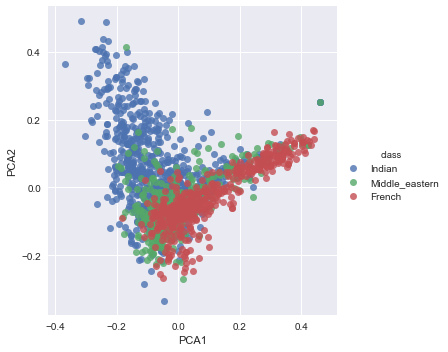

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X2D = pca.transform(X)

df['PCA1'] = X2D[:, 0]
df['PCA2'] = X2D[:, 1]
df['class_num'] = y

sns.lmplot('PCA1', 'PCA2', data=df, hue='class', fit_reg=False);

In [45]:
pca = PCA(n_components=5)
pca.fit(X)
X5D = pca.transform(X)

df['PCA1'] = X5D[:, 0]
df['PCA2'] = X5D[:, 1]
df['PCA3'] = X5D[:, 2]
df['PCA4'] = X5D[:, 3]
df['PCA5'] = X5D[:, 4]

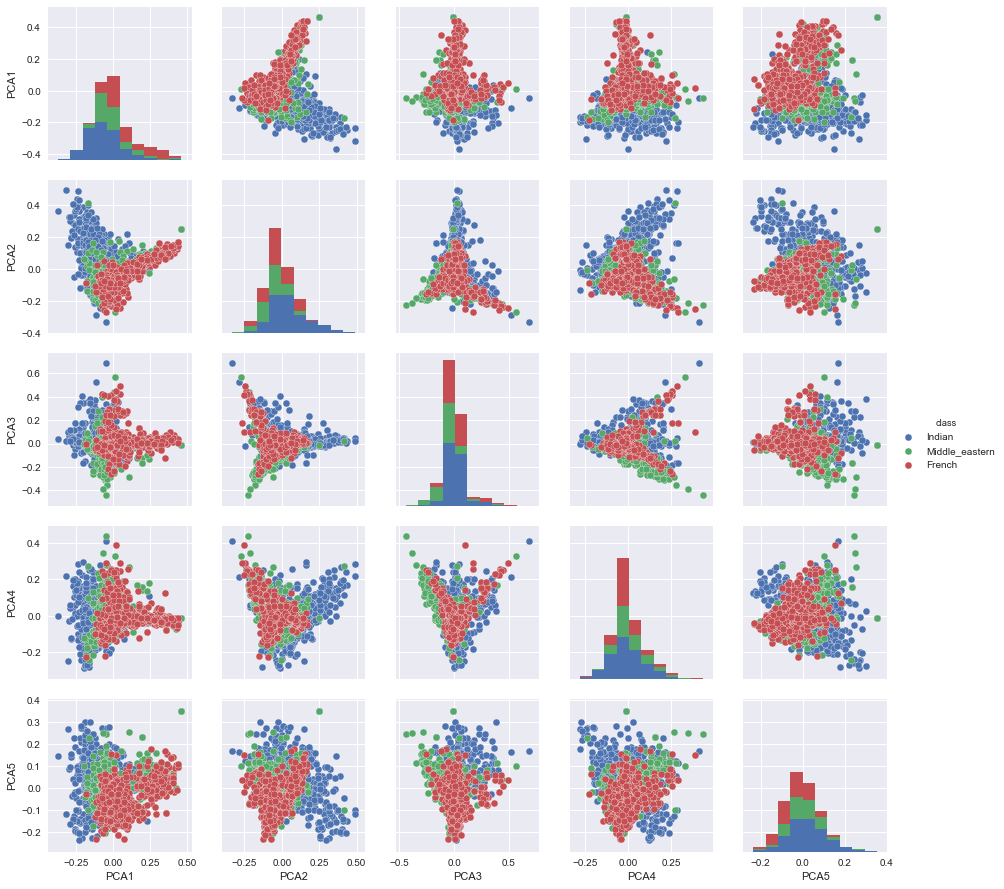

In [46]:
df_for_pp = df[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'class']]
sns.pairplot(df_for_pp, hue='class');

### Isomap

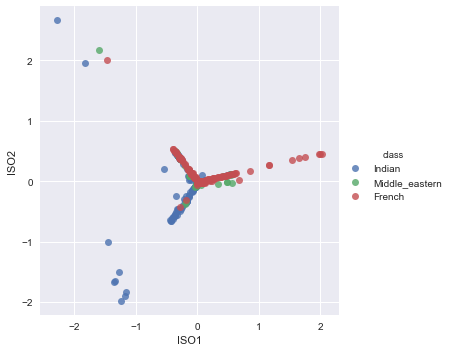

In [47]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(X)
X2D = iso.transform(X)

df['ISO1'] = X2D[:, 0]
df['ISO2'] = X2D[:, 1]
df['class_num'] = y

sns.lmplot('ISO1', 'ISO2', data=df, hue='class', fit_reg=False);

### Gaussian Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(Xtrain, ytrain)
ypred = nb.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.7032710280373832

### Multinomial Naive Bayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)
ypred = mnb.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.7780373831775701

Text(92.68,0.5,'Predicted class')

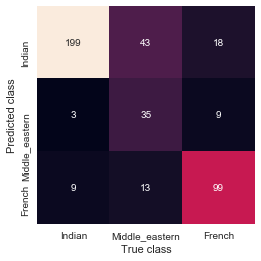

In [50]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class')

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
ypred = lr.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.8060747663551402

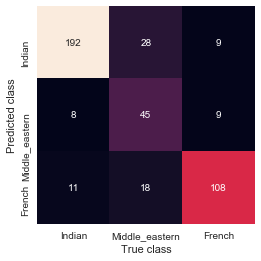

In [52]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class');

### Decision trees and random forests

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(Xtrain, ytrain)

In [54]:
ypred = tree.predict(Xtest)
accuracy_score(ytest, ypred)

0.6658878504672897

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(Xtrain, ytrain)
ypred = rfc.predict(Xtest)
accuracy_score(ytest, ypred)

0.7406542056074766

Text(92.68,0.5,'Predicted class')

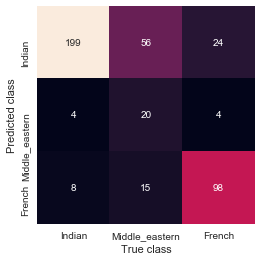

In [57]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['Indian', 'Middle_eastern', 'French'], 
           yticklabels=['Indian', 'Middle_eastern', 'French'])
plt.xlabel('True class')
plt.ylabel('Predicted class')

## Grid search

### Logistic regression

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.10, 1.0, 10., 100.],
              'fit_intercept': [False, True],
              'max_iter': [50, 100, 200]}

gs = GridSearchCV(estimator=LogisticRegression(),
                 param_grid = param_grid,
                 scoring='accuracy',
                 cv=5)

gs.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1.0, 10.0, 100.0], 'fit_intercept': [False, True], 'max_iter': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
gs.best_params_

{'C': 10.0, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'l2'}

In [60]:
gs.best_score_

0.782371294851794

In [61]:
clf = gs.best_estimator_

Prediction

In [62]:
clf.score(Xtest, ytest)

0.8060747663551402